In [21]:
import pickle
import pandas as pd
import re
import nltk
import numpy as np
import datetime
import matplotlib.pyplot as plt
# import wandb

from os import path
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

from DataProvider import Getter
from Analyser import Trainer

In [13]:
# changing depth of decision tree classifier to find model with best accuracy
# Gini
print("------------------------------------------")
now = datetime.datetime.now()
print("{} : start training".format(now.strftime("%Y-%m-%d %H:%M:%S")))

getter = Getter()
X_tfidf, y, tfIdfVectorizer = getter.get_X_tfidf_y_training_set_for_sentiment_clf_decision_tree()


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

accuracies_train = []
accuracies_test = []
ye_pred_probs = []

depths = [20,1000,2000,3000,4000,5000]

for depth in depths:

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="gini", max_depth=depth)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    now = datetime.datetime.now()
    print("depth {}: finished training".format(depth))

    # Create predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:, -1] # probability estimates of the positive class
    
    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    
    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)
    ye_pred_probs.append(y_pred_prob)
    
    # Model Accuracy
    print(metrics.classification_report(y_test,y_test_pred))
    print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, y_test_pred),4)))
    print("-------------------------------------")

------------------------------------------
2021-05-03 18:40:06 : start training
depth 20: finished training
              precision    recall  f1-score   support

           0       0.61      0.93      0.74     47624
           1       0.90      0.50      0.64     57199

    accuracy                           0.70    104823
   macro avg       0.75      0.72      0.69    104823
weighted avg       0.77      0.70      0.69    104823

Accuracy: 0.6974
-------------------------------------
depth 1000: finished training
              precision    recall  f1-score   support

           0       0.73      0.83      0.77     47624
           1       0.84      0.74      0.79     57199

    accuracy                           0.78    104823
   macro avg       0.78      0.78      0.78    104823
weighted avg       0.79      0.78      0.78    104823

Accuracy: 0.7807
-------------------------------------
depth 2000: finished training
              precision    recall  f1-score   support

           0 

On the test set the highest accuracy comes from depths 4000
Max test accuracy:  0.7835494118657165


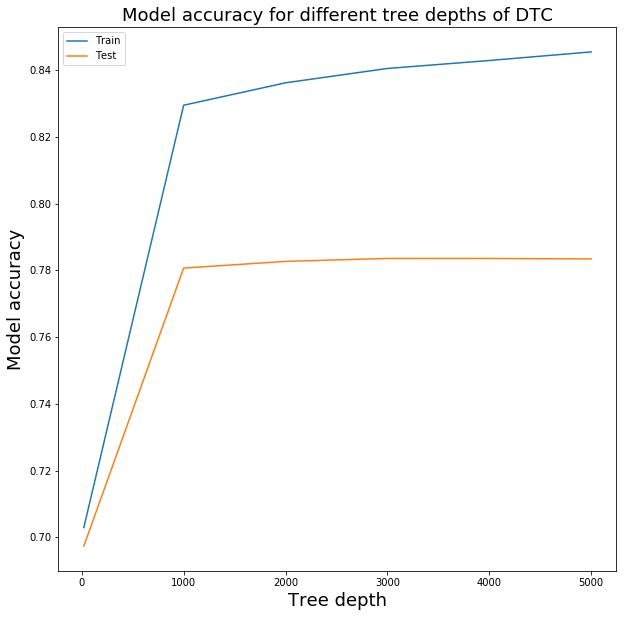

In [18]:
plt.figure(figsize=(10,10))
plt.plot(depths,accuracies_train,label="Train")
plt.plot(depths,accuracies_test,label="Test")
plt.ylabel("Model accuracy", fontsize=18)
plt.xlabel("Tree depth", fontsize=18)
plt.legend()
plt.title("Model accuracy for different tree depths of DTC",fontsize=18)
print('On the test set the highest accuracy comes from depths',depths[np.argmax(np.array(accuracies_test))+1])
print('Max test accuracy: ',np.max(np.array(accuracies_test)))

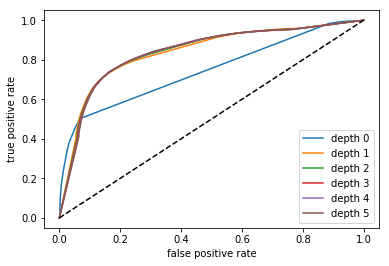

In [15]:
fig, axis = plt.subplots()
area_under_roc={}
for i, prob in enumerate(ye_pred_probs):
    fpr,tpr, _ = roc_curve(y_test, prob)
    
    depth = "depth {}".format(i)
    area_under_roc[depth] = roc_auc_score(y_test, prob)
    axis.plot(fpr, tpr, label=depth)
    if i ==5:
        break
axis.plot([0,1], [0,1], 'k--')
axis.set_xlabel('false positive rate')
axis.set_ylabel('true positive rate')
axis.legend()
plt.show()

In [20]:
# changing depth of decision tree classifier to find model with best accuracy
# Entropy
print("------------------------------------------")
now = datetime.datetime.now()
print("{} : start training".format(now.strftime("%Y-%m-%d %H:%M:%S")))

getter = Getter()
X_tfidf, y, tfIdfVectorizer = getter.get_X_tfidf_y_training_set_for_sentiment_clf_decision_tree()


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

accuracies_train = []
accuracies_test = []
ye_pred_probs = []

depths = [20,1000,2000,3000,4000,5000]

for depth in depths:

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    now = datetime.datetime.now()
    print("depth {}: finished training".format(depth))

    # Create predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:, -1] # probability estimates of the positive class
    
    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    
    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)
    ye_pred_probs.append(y_pred_prob)
    
    # Model Accuracy
    print(metrics.classification_report(y_test,y_test_pred))
    print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, y_test_pred),4)))
    print("-------------------------------------")

------------------------------------------
2021-05-03 19:50:46 : start training
depth 20: finished training
              precision    recall  f1-score   support

           0       0.61      0.93      0.74     47624
           1       0.90      0.50      0.64     57199

    accuracy                           0.70    104823
   macro avg       0.75      0.72      0.69    104823
weighted avg       0.77      0.70      0.69    104823

Accuracy: 0.6971
-------------------------------------
depth 1000: finished training
              precision    recall  f1-score   support

           0       0.73      0.83      0.77     47624
           1       0.84      0.74      0.79     57199

    accuracy                           0.78    104823
   macro avg       0.78      0.78      0.78    104823
weighted avg       0.79      0.78      0.78    104823

Accuracy: 0.7794
-------------------------------------
depth 2000: finished training
              precision    recall  f1-score   support

           0 

On the test set the highest accuracy comes from depths 5000
Max test accuracy:  0.7833967736088454


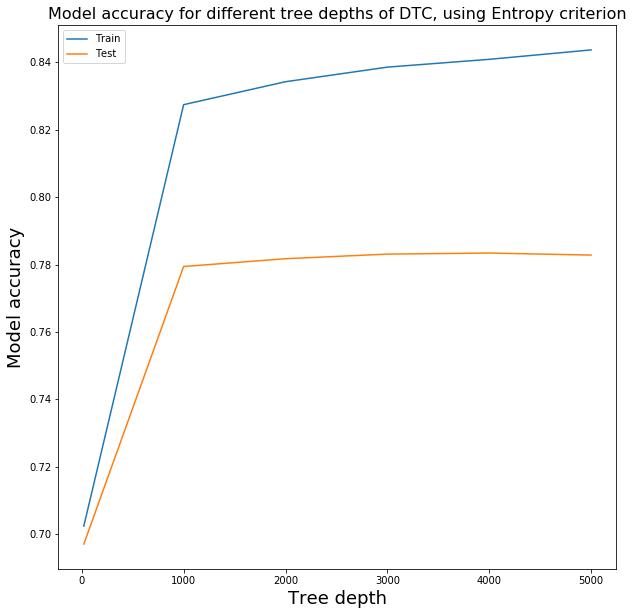

In [23]:
plt.figure(figsize=(10,10))
plt.plot(depths,accuracies_train,label="Train")
plt.plot(depths,accuracies_test,label="Test")
plt.ylabel("Model accuracy", fontsize=18)
plt.xlabel("Tree depth", fontsize=18)
plt.legend()
plt.title("Model accuracy for different tree depths of DTC, using Entropy criterion",fontsize=16)
print('On the test set the highest accuracy comes from depths',depths[np.argmax(np.array(accuracies_test))+1])
print('Max test accuracy: ',np.max(np.array(accuracies_test)))

In [16]:
# SVC

print("------------------------------------------")
now = datetime.datetime.now()
print("{} : start training".format(now.strftime("%Y-%m-%d %H:%M:%S")))

getter = Getter()
X, y = getter.get_training_set_for_sentiment_clf_decision_tree()

# reduce dataset size
n = 10000
X = X[:n] + X[-n:]
y = y[:n] + y[-n:]

tfIdfVectorizer = TfidfVectorizer(use_idf=True)
X_tfidf = tfIdfVectorizer.fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# train the model on train set
model = SVC(random_state=42)
model.fit(X_train, y_train)
  
# print prediction results
y_test_pred = model.predict(X_test)

# Model Accuracy
print(metrics.classification_report(y_test,y_test_pred))
print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, y_test_pred),4)))
print("-------------------------------------")

------------------------------------------
2021-05-03 21:46:35 : start training
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1981
           1       0.81      0.72      0.76      2019

    accuracy                           0.77      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.78      0.77      0.77      4000

Accuracy: 0.7715
-------------------------------------


In [17]:
print("------------------------------------------")
now = datetime.datetime.now()
print("{} : start training".format(now.strftime("%Y-%m-%d %H:%M:%S")))

getter = Getter()
X_tfidf, y, tfIdfVectorizer = getter.get_X_tfidf_y_training_set_for_sentiment_clf_decision_tree()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create SVC object
svc = SVC(random_state=42)

# Train Decision Tree Classifer
svc = svc.fit(X_train,y_train)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']} 

grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 3, n_jobs=-1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

now = datetime.datetime.now()

# Create predictions

print("best estimator = {}".format(grid.best_estimator_))
print("best parameters = {}".format(grid.best_params_))

grid_predictions = grid.predict(X_test)


# Model Accuracy
print(metrics.classification_report(y_test,grid_predictions))
print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, grid_predictions),4)))
print("-------------------------------------")

------------------------------------------
2021-05-03 21:47:08 : start training
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 13.0min finished


NameError: name 'depth' is not defined

In [18]:
print("best estimator = {}".format(grid.best_estimator_))
print("best parameters = {}".format(grid.best_params_))

grid_predictions = grid.predict(X_test)


# Model Accuracy
print(metrics.classification_report(y_test,grid_predictions))
print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, grid_predictions),4)))
print("-------------------------------------")

best estimator = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
best parameters = {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1981
           1       0.81      0.72      0.76      2019

    accuracy                           0.77      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.78      0.77      0.77      4000

Accuracy: 0.7715
-------------------------------------


In [20]:
# Random Forest Classifier

print("------------------------------------------")
now = datetime.datetime.now()
print("{} : start training".format(now.strftime("%Y-%m-%d %H:%M:%S")))

getter = Getter()
X, y = getter.get_training_set_for_sentiment_clf_decision_tree()

# reduce dataset size
n = 10000
X = X[:n] + X[-n:]
y = y[:n] + y[-n:]

tfIdfVectorizer = TfidfVectorizer(use_idf=True)
X_tfidf = tfIdfVectorizer.fit_transform(X)

# getter = Getter()
# X_tfidf, y, tfIdfVectorizer = getter.get_X_tfidf_y_training_set_for_sentiment_clf_decision_tree()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# train the model on train set
random_model = RandomForestClassifier(max_depth=1000, random_state=0)
random_model.fit(X_train, y_train)
  
# print prediction results
y_randomforest_pred = random_model.predict(X_test)

# Model Accuracy
print(metrics.classification_report(y_test,y_randomforest_pred))
print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, y_randomforest_pred),4)))
print("-------------------------------------")

------------------------------------------
2021-05-04 01:51:53 : start training
              precision    recall  f1-score   support

           0       0.75      0.81      0.77      1981
           1       0.79      0.73      0.76      2019

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000

Accuracy: 0.7678
-------------------------------------


In [28]:
# Neural network MLPClassifier

print("------------------------------------------")
now = datetime.datetime.now()
print("{} : start training".format(now.strftime("%Y-%m-%d %H:%M:%S")))

getter = Getter()
X, y = getter.get_training_set_for_sentiment_clf_decision_tree()

# reduce dataset size
n = 10000
X = X[:n] + X[-n:]
y = y[:n] + y[-n:]

tfIdfVectorizer = TfidfVectorizer(use_idf=True)
X_tfidf = tfIdfVectorizer.fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

MLP_clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, verbose=5)
MLP_clf.fit(X_train, y_train)

# print prediction results
y_MLP_pred = MLP_clf.predict(X_test)

# Model Accuracy
print(metrics.classification_report(y_test,y_MLP_pred))
print("Accuracy: {}".format(round(metrics.accuracy_score(y_test, y_MLP_pred),4)))
print("-------------------------------------")

------------------------------------------
2021-05-04 02:28:39 : start training
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 14.3min finished


              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1981
           1       0.81      0.75      0.78      2019

    accuracy                           0.78      4000
   macro avg       0.79      0.78      0.78      4000
weighted avg       0.79      0.78      0.78      4000

Accuracy: 0.7845
-------------------------------------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


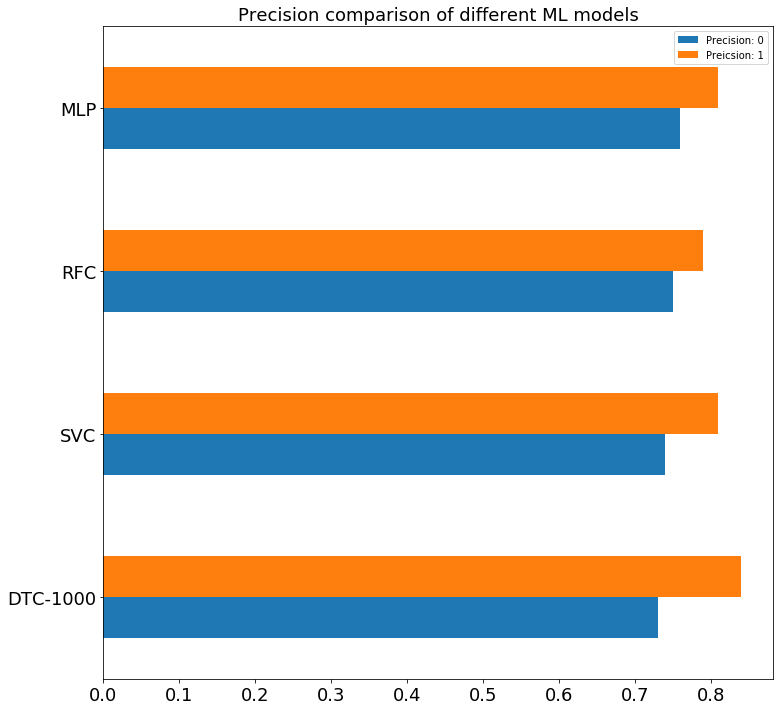

In [37]:

data = {'Precision: 0': [0.73,0.74,0.75,0.76],
        'Preicsion: 1': [0.84,0.81,0.79,0.81]
       }
df = pd.DataFrame(data,columns=['Precision: 0','Preicsion: 1'], index = ['DTC-1000','SVC','RFC','MLP'])

# df.plot()
df.plot.barh(figsize=(12,12), fontsize=18)

plt.title('Precision comparison of different ML models', fontsize=18)
plt.show()

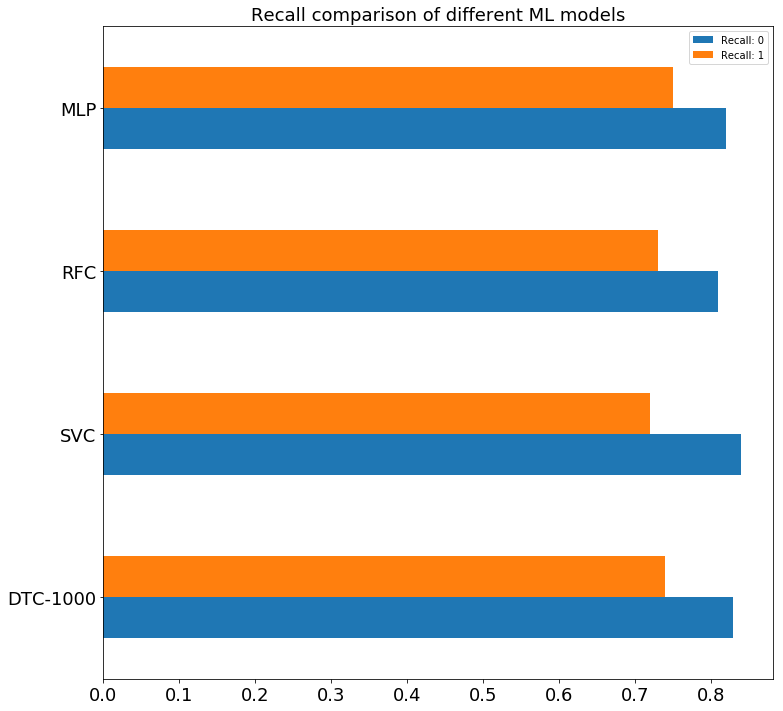

In [38]:
data = {'Recall: 0': [0.83,0.84,0.81,0.82],
        'Recall: 1': [0.74,0.72,0.73,0.75]
       }
df = pd.DataFrame(data,columns=['Recall: 0','Recall: 1'], index = ['DTC-1000','SVC','RFC','MLP'])

# df.plot()
df.plot.barh(figsize=(12,12), fontsize=18)

plt.title('Recall comparison of different ML models', fontsize=18)
plt.show()

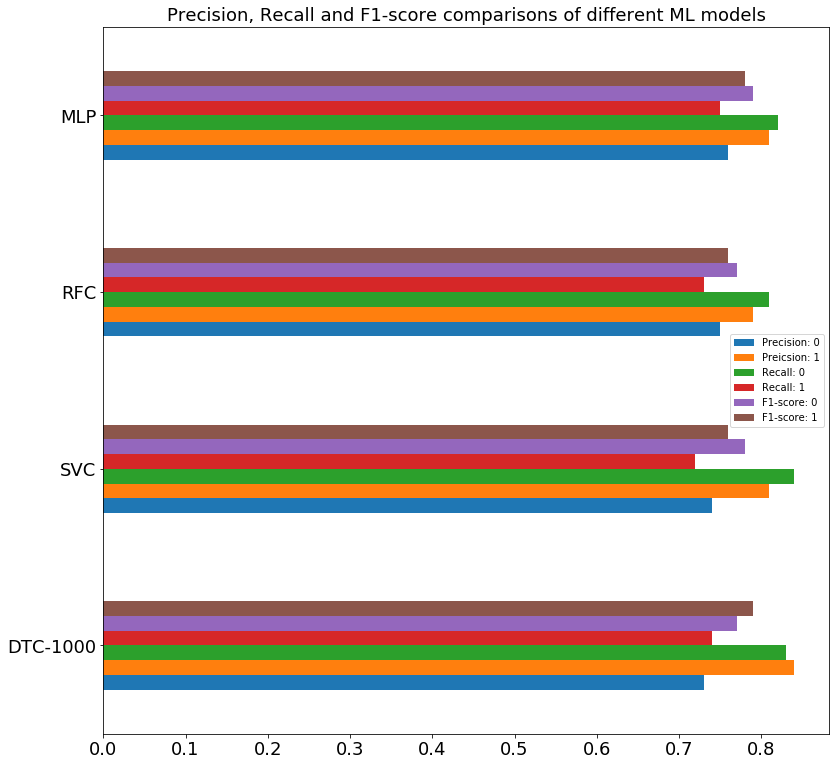

In [45]:
data = {'Precision: 0': [0.73,0.74,0.75,0.76],
        'Preicsion: 1': [0.84,0.81,0.79,0.81],
        'Recall: 0': [0.83,0.84,0.81,0.82],
        'Recall: 1': [0.74,0.72,0.73,0.75],
        'F1-score: 0': [0.77,0.78,0.77,0.79],
        'F1-score: 1': [0.79,0.76,0.76,0.78]
       }
df = pd.DataFrame(data,columns=['Precision: 0','Preicsion: 1','Recall: 0','Recall: 1','F1-score: 0','F1-score: 1'],
                  index = ['DTC-1000','SVC','RFC','MLP'])

# df.plot()
df.plot.barh(figsize=(13,13), fontsize=18)
plt.title('Precision, Recall and F1-score comparisons of different ML models', fontsize=18)
plt.show()